In [7]:
import pandas as pd

facebook_ads = pd.read_csv('C:/Users/User/Downloads/facebook_ads_data.csv')
facebook_ads.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


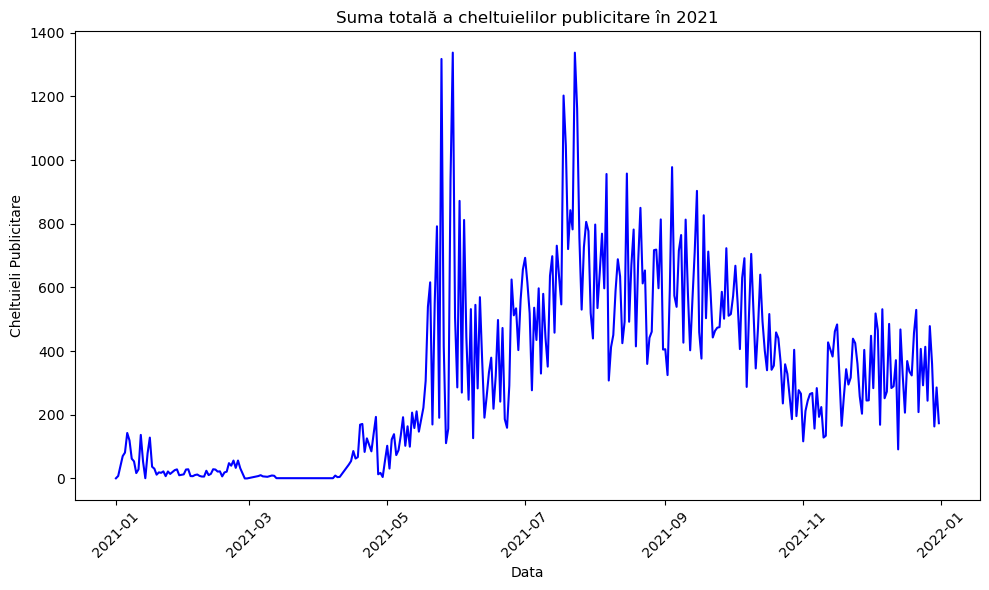

In [11]:
import matplotlib.pyplot as plt

#1 Grupează datele după zile și creează două grafice pentru datele grupate:
   #Un grafic cu suma totală a cheltuielilor publicitare în anul 2021;
   #Un grafic cu ROMI-ul zilnic în anul 2021.

facebook_ads['ad_date'] = pd.to_datetime(facebook_ads['ad_date'])
ads_2021 = facebook_ads[facebook_ads['ad_date'].dt.year == 2021]
grouped_ads = ads_2021.groupby(ads_2021['ad_date'].dt.date).agg(
    total_ad_spend = ('total_spend', 'sum'),
    total_value = ('total_value', 'sum')
).reset_index()
grouped_ads['romi'] = (grouped_ads['total_value'] - grouped_ads['total_ad_spend']) / grouped_ads['total_ad_spend']

#Grafic cu suma totală a cheltuielilor publicitare în anul 2021:
plt.figure(figsize=(10, 6)),
plt.plot(grouped_ads['ad_date'], grouped_ads['total_ad_spend'], label='Total Ad Spend', color='blue'),
plt.title('Suma totală a cheltuielilor publicitare în 2021'),
plt.xlabel('Data'),
plt.ylabel('Cheltuieli Publicitare'),
plt.xticks(rotation=45),
plt.tight_layout()
plt.show()

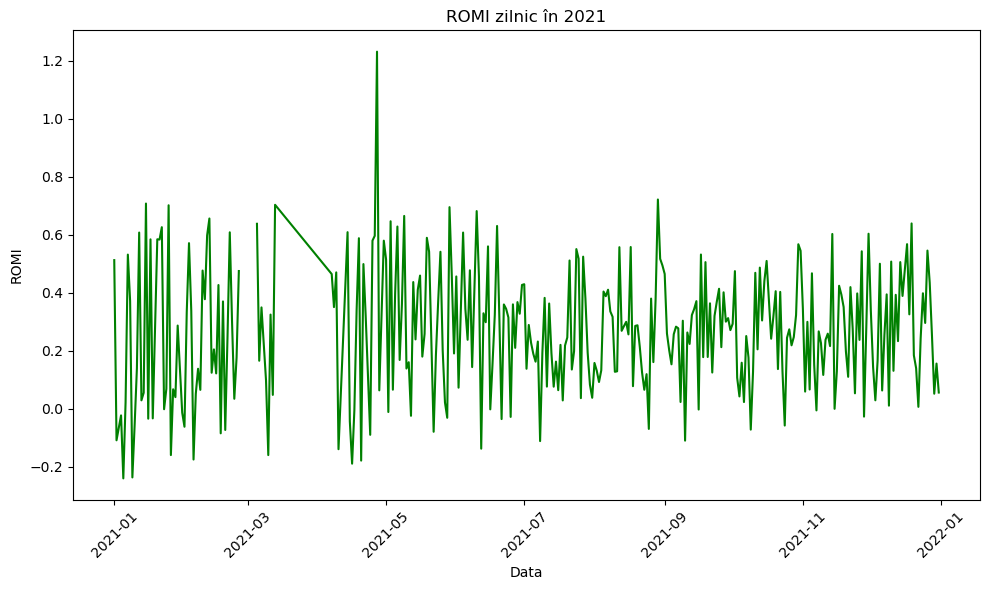

In [13]:
#Grafic cu ROMI-ul zilnic în anul 2021:
plt.figure(figsize=(10, 6)),
plt.plot(grouped_ads['ad_date'], grouped_ads['romi'], label='ROMI zilnic', color='green'),
plt.title('ROMI zilnic în 2021'),
plt.xlabel('Data'),
plt.ylabel('ROMI'),
plt.xticks(rotation=45),
plt.tight_layout()
plt.show()

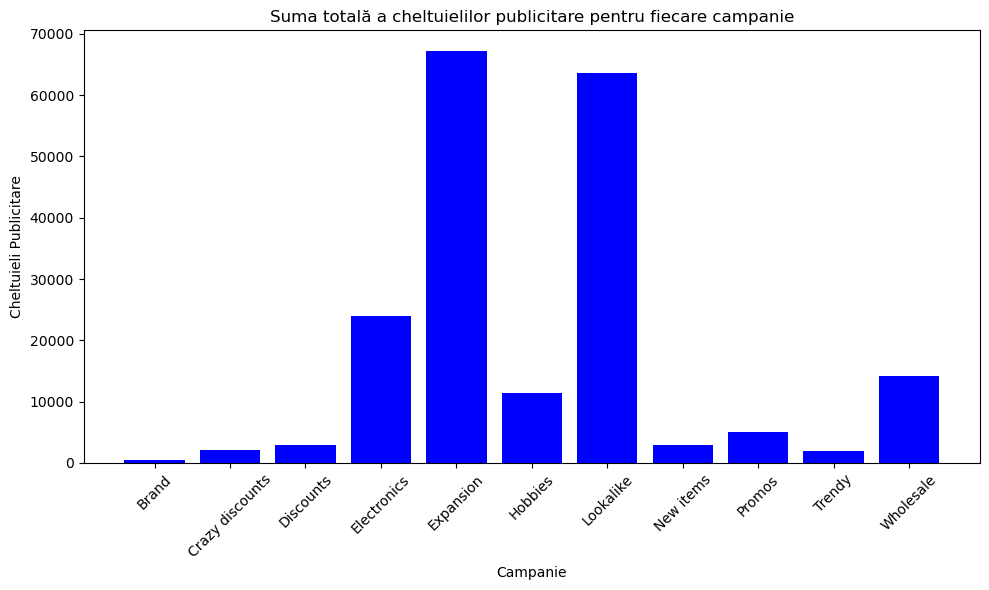

In [29]:
#2 Grupează datele după numele campaniei și creează două grafice:
   #Un grafic cu suma totală a cheltuielilor publicitare pentru fiecare campanie;
   #Un grafic cu ROMI-ul total pentru fiecare campanie.

grouped_campaign = facebook_ads.groupby('campaign_name').agg(
    total_ad_spend = ('total_spend', 'sum'),
    total_value = ('total_value', 'sum')
).reset_index()
grouped_campaign['romi'] = (grouped_campaign['total_value'] - grouped_campaign['total_ad_spend']) / grouped_campaign['total_ad_spend']

#rafic cu suma totală a cheltuielilor publicitare pentru fiecare campanie:
plt.figure(figsize=(10, 6))
plt.bar(grouped_campaign['campaign_name'], grouped_campaign['total_ad_spend'], color='blue')
plt.title('Suma totală a cheltuielilor publicitare pentru fiecare campanie')
plt.xlabel('Campanie')
plt.ylabel('Cheltuieli Publicitare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

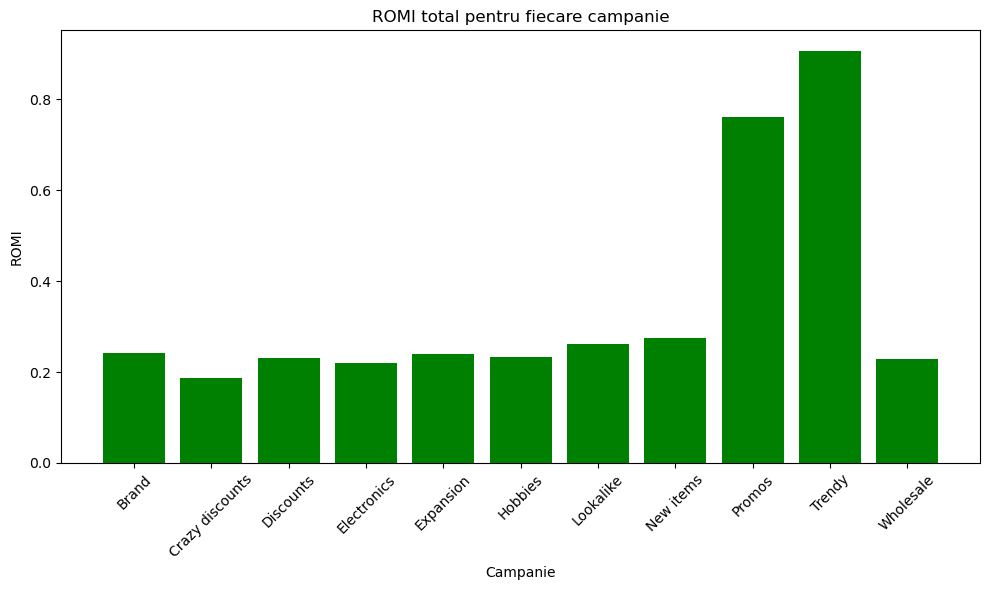

In [31]:
#Grafic cu ROMI-ul total pentru fiecare campanie:
plt.figure(figsize=(10, 6))
plt.bar(grouped_campaign['campaign_name'], grouped_campaign['romi'], color='green')
plt.title('ROMI total pentru fiecare campanie')
plt.xlabel('Campanie')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

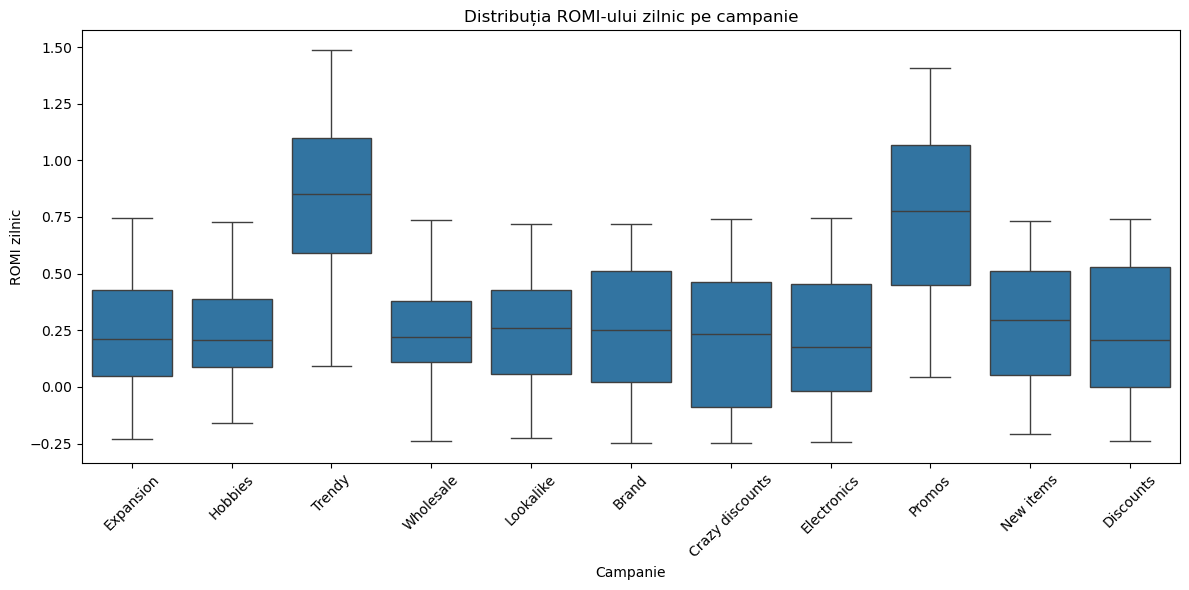

In [41]:
#3 Utilizând un box plot, determină distribuția ROMI-ului zilnic în fiecare campanie (după numele campaniei).

import seaborn as sns

facebook_ads['romi'] = (facebook_ads['total_value'] - facebook_ads['total_spend']) / facebook_ads['total_spend']

plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_name', y='romi_daily', data=facebook_ads)
plt.title('Distribuția ROMI-ului zilnic pe campanie')
plt.xlabel('Campanie')
plt.ylabel('ROMI zilnic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

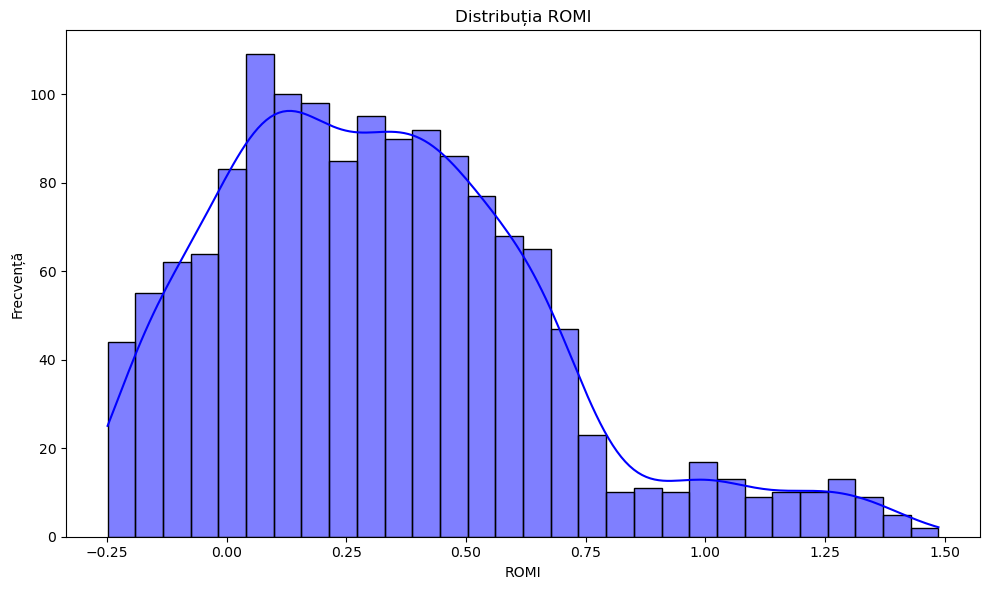

In [45]:
#4 Creează o histogramă cu distribuția valorilor ROMI din tabelul facebook_ads_data.csv.

facebook_ads['romi'] = (facebook_ads['total_value'] - facebook_ads['total_spend']) / facebook_ads['total_spend']

plt.figure(figsize=(10, 6))
sns.histplot(facebook_ads['romi'], bins=30, kde=True, color='blue')
plt.title('Distribuția ROMI')
plt.xlabel('ROMI')
plt.ylabel('Frecvență')
plt.tight_layout()
plt.show()

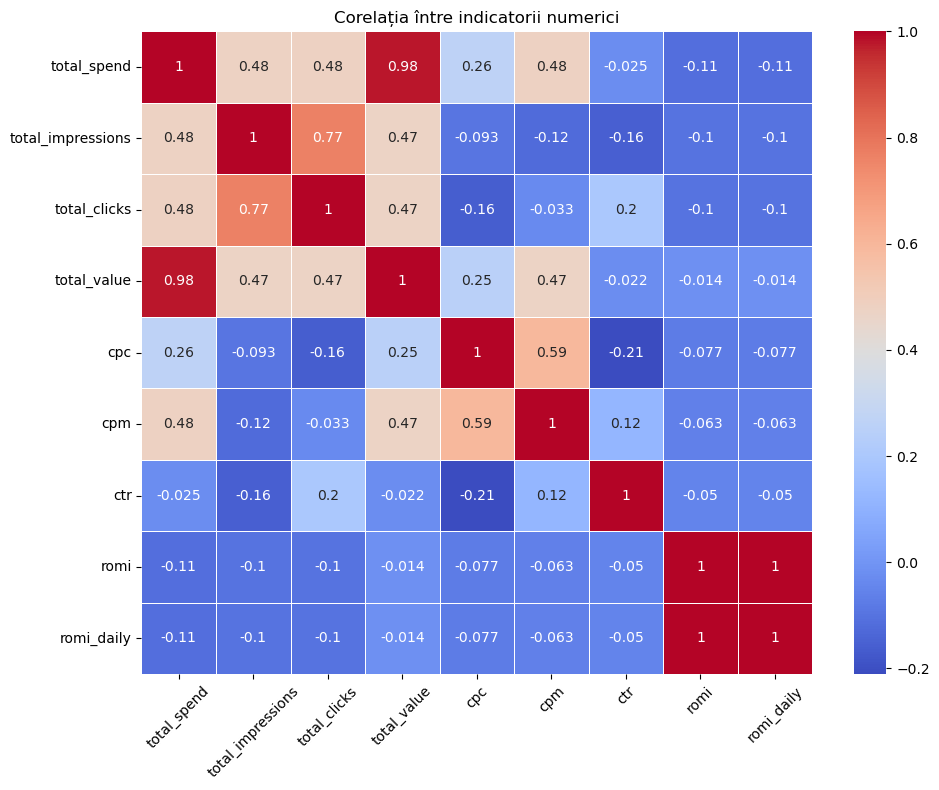

In [53]:
#5 Creează un heat map a corelației între toți indicatorii numerici din tabelul facebook_ads_data.csv. 
   #Care indicatori au cea mai mare și cea mai mică corelație? Cu ce corelează “total_value”?

numeric_columns = facebook_ads.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corelația între indicatorii numerici')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
max_correlation = correlation_matrix.unstack().sort_values(ascending=False)
max_correlation = max_correlation[max_correlation < 1]
print("Cele mai mari corelații:\n", max_correlation.head(5))
print("\nCele mai mici corelații:\n", max_correlation.tail(5))

Cele mai mari corelații:
 total_spend        total_value          0.978890
total_value        total_spend          0.978890
total_clicks       total_impressions    0.765489
total_impressions  total_clicks         0.765489
cpm                cpc                  0.593732
dtype: float64

Cele mai mici corelații:
 total_impressions  ctr            -0.155701
total_clicks       cpc            -0.159521
cpc                total_clicks   -0.159521
                   ctr            -0.210719
ctr                cpc            -0.210719
dtype: float64


In [51]:
total_value_corr = correlation_matrix['total_value'].sort_values(ascending=False)
print("\nCorelațiile lui 'total_value':\n", total_value_corr)


Corelațiile lui 'total_value':
 total_value          1.000000
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
romi_daily          -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


<Figure size 1000x600 with 0 Axes>

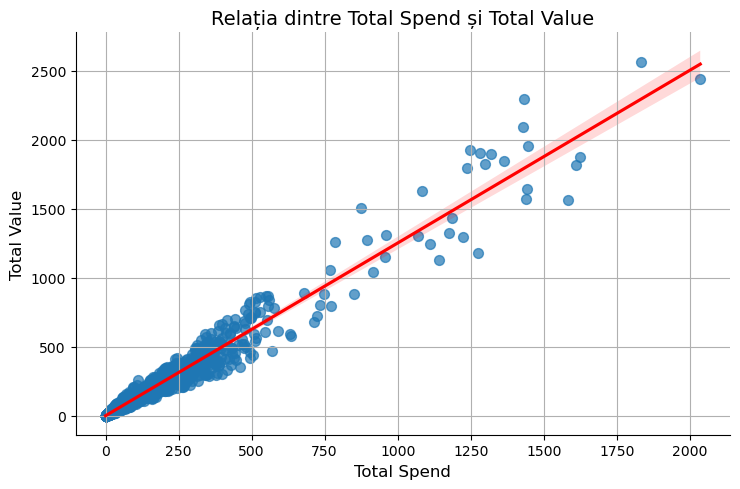

In [59]:
#6 Creează un grafic cu puncte cu regresie liniară (poți folosi funcția lmplot()), 
   #pe baza datelor din “total_spend” și “total_value” pentru a vizualiza relația dintre aceste variabile.

plt.figure(figsize=(10, 6))
sns.lmplot(x='total_spend', y='total_value', data=facebook_ads, aspect=1.5, scatter_kws={"s": 50, "alpha": 0.7}, line_kws={"color": "red"})
plt.title('Relația dintre Total Spend și Total Value', fontsize=14)
plt.xlabel('Total Spend', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()